## CCNSS 2018 Module 3: Reinforcement learning and planning
# Tutorial 2: Multi-armed bandits



# **Introduction**

In this tutorial, we will learn about different ways to select actions based on value estimates in an k-armed bandit context.

**Environment:**

Consider the following learning problem. You are faced repeatedly with a choice among $k$ different options, or actions. After each choice you receive a numerical reward chosen from a stationary probability distribution that depends on the action you selected. Your objective is to maximize the expected total reward over some time period, for example, over 1000 action selections, or time steps.
This is the original form of the k-armed bandit problem, so named by analogy to a slot machine.

**Definitions:**

1. Action-value function
\begin{align}
q (a) = \mathbb{E} [r_{t} | a_{t} = a]
\end{align}

2. Action-value updates:
\begin{align}
q_{t}(a) \leftarrow q_{t}(a) + \alpha (r_{t} - q_{t}(a))
\end{align}

3. Greedy policy:
\begin{align}
a_{t} = \text{argmax}_{a} \; q_{t} (a)
\end{align}

4. $\epsilon$-greedy policy:
\begin{align}
P (a_{t} = a) = 
        \begin{cases}
        1 - \epsilon    & \quad \text{if } a_{t} = \text{argmax}_{a} \; q_{t} (a) \\
        \epsilon/(N-1)        & \quad \text{else} 
        \end{cases} 
\end{align}


**Please run the following code for your implementations:**

In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

In [2]:
class n_armed_bandit():
    """
    World: N-Armed bandit.
    Only one state, multiple actions.
    Each action returns different amount of reward.
    For each action, rewards are randomly sampled from normal distribution, 
        with a mean associated with that arm and unit variance.
    """
    
    def __init__(self, arm_number):
        self.name = "n_armed_bandit"
        self.n_states = 1
        self.n_actions = arm_number
        self.dim_x = 1
        self.dim_y = 1
        
        self.mu = [np.random.normal(0,1) for a in range(self.n_actions)]
        
    def get_outcome(self, state, action):
        
        self.rewards = [np.random.normal(self.mu[i],1) for i in range(self.n_actions)]
        next_state = None
        
        reward = self.rewards[action]
        return int(next_state) if next_state is not None else None, reward

In [3]:
class drifting_n_armed_bandit():
    """
    World: N-Armed bandit.
    Only one state, multiple actions.
    Each action returns different amounts of rewards.
    For each action, rewards are randomly sampled from normal distribution, 
        with a mean associated with that arm and unit variance.
    In the case of the non-stationary bandit, the mean reward associated with each arm 
        follows a Gaussian random.
    """

    def __init__(self, arm_number, drift):
        self.name = "drifting_n_armed_bandit"
        self.n_states = 1
        self.n_actions = arm_number
        self.dim_x = 1
        self.dim_y = 1
        
        self.mu_min = 0.25
        self.mu_max = 0.75
        self.drift = drift
        
        self.mu = [np.random.normal(0,0) for a in range(self.n_actions)]

    def update_mu(self):
        self.mu += np.random.normal(0, self.drift, self.n_actions)
            
    def get_outcome(self, state, action):
        
        self.update_mu()
        self.rewards = [np.random.normal(self.mu[i],1) for i in range(self.n_actions)]
        next_state = None
        
        reward = self.rewards[action]
        return int(next_state) if next_state is not None else None, reward

In [4]:
def e_greedy_policy(q, epsilon):
    if np.random.uniform(0,1) > epsilon:
        return np.argmax(q)
    else:
        # choose randomly from all but the highest q value
        a_list = np.arange(len(q))
        arg_max = np.argmax(q)
        choices = np.delete(a_list, arg_max)
        return np.random.choice(np.delete(a_list, arg_max))

# **Exercise 1:**

Estimate the action value function of each of the $k$ actions in the bandit problem using the above update rule while choosing actions using an $\epsilon$-greedy policy to choose actions. Run for 1000 steps (i.e. take 1000 actions for a set of bandits that each have a fixed probability of returning a reward). 

Plot reward obtained on each timestep for a randomly chosen bandit problem (i.e. a set of bandit arms with randomly chosen probabilities of providing rewards). 


Reward received each step


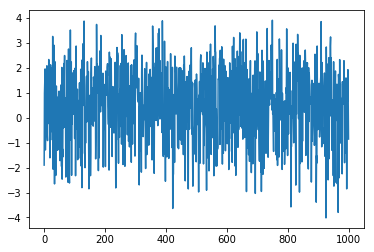

Evolution of the action value for each action


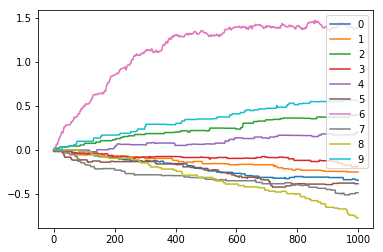

In [5]:

    
n_arms = 10
n_steps = 1000
epsilon = 0.5
alpha = 0.01

nab = n_armed_bandit(n_arms)
q = np.zeros(nab.n_actions)
rwd = np.zeros(n_steps)
q_ev = np.zeros((n_arms, n_steps)) # q evolution
a_hist = np.zeros(n_steps) # a history (action)

action = np.random.choice(np.arange(len(q)))

for s in range(n_steps):
    # calc and save reward
    _, reward = nab.get_outcome(0, action)
    rwd[s] = reward
    q[action] = q[action] + alpha * (reward - q[action])
    
    #save q evolution in time
    q_ev[:, s] = q[:]
    a_hist[s] = action
    
    #action selection
    action = e_greedy_policy(q, epsilon)
    
print('Reward received each step')
plt.plot(rwd)
plt.show()

print('Evolution of the action value for each action')
for a in range(n_arms):
    plt.plot(q_ev[a,:], label = str(a))
plt.legend()
plt.show()

# **Exercise 2:**

1. Repeat above for 1000 runs (i.e. reset the bandit environment 1000 times, each time the bandit arms will get associated with randomly chosen probabilities of returning a reward), for different values of $\epsilon \in \{0,0.1,0.01\}$. Use $\alpha = 0.01$.
2. Plot performance curves i.e. fraction of runs on which optimal action was chosen at each time step, for the different values of $\epsilon$. At each step check over all 1000 runs to determine the fraction of runs in which the optimal action was chosen. 
3. Change the learning rate $\alpha$ and plot performance curves. 
4. Plot average rewards and performance curves using decaying learning rates of $\alpha = 1/N(a)$, where $N(a)$ is the number of times bandit arm $a$ was chosen. 
5. Can you describe how $\epsilon$ and $\alpha$ affect the agent's performance? Tip: pay attention to the y-axis in your plots.
6. (Optional) For which value of $\epsilon$ will the above perform best in the long run in terms of cumulative reward and probability of selecting the best action? How much better will it be? Express your answer quantitatively.

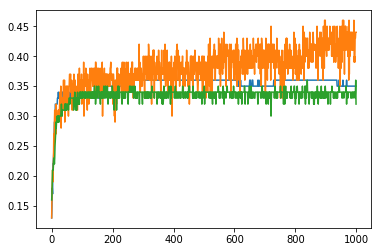

In [26]:
n_arms = 10
n_steps = 1000
epsilon = 0.0
alpha = 0.01

n_runs = 100

for epsilon in [0, 0.1, 0.01]:
    best_hist = np.zeros((n_runs, n_steps))

    for run in range(n_runs):

        nab = n_armed_bandit(n_arms)
        q = np.zeros(nab.n_actions)
        rwd = np.zeros(n_steps)
        q_ev = np.zeros((n_arms, n_steps)) # q evolution
        a_hist = np.zeros(n_steps) # a history (action)

        action = np.random.choice(np.arange(len(q)))

        best_option = np.argmax(nab.mu)


        for s in range(n_steps):
            # calc and save reward
            _, reward = nab.get_outcome(0, action)
            rwd[s] = reward
            q[action] = q[action] + alpha * (reward - q[action])

            #save q evolution in time
            q_ev[:, s] = q[:]
            a_hist[s] = action

            #action selection
            action = e_greedy_policy(q, epsilon)

            if best_option == action:
                best_hist[run, s] = 1

    plt.plot(np.mean(best_hist, 0))


# **Exercise 3:**

Estimate action values using an $\epsilon$-greedy policy, using *optimistic starts* i.e. initialise your action value function to be a value greater than zero ($q_{0}(a)> 0$). 

Use $q_{0}(a) = 5$ and a fixed learning rate $\alpha = 0.1$. 

1. Plot performance curves of $\epsilon$-greedy action selection (for $\epsilon = 0.1$) and using optimistic starts with greedy action selection. Overlay these plots.
2. How does performance change for different values of $\epsilon$?
3. Change $q_{0}(a)$ and plot performance curves for different optimistic initial values. 
4. Can you explain why the initialisation is causing a difference in performance?


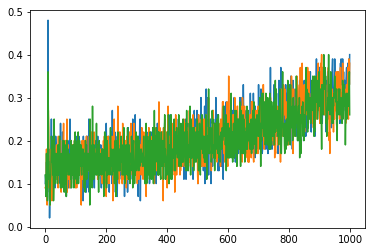

In [27]:
n_arms = 10
n_steps = 1000
epsilon = 0.0
alpha = 0.01

n_runs = 100

for epsilon in [0, 0.1, 0.01]:
    best_hist = np.zeros((n_runs, n_steps))

    for run in range(n_runs):

        nab = n_armed_bandit(n_arms)
        q = np.zeros(nab.n_actions) + 5
        rwd = np.zeros(n_steps)
        q_ev = np.zeros((n_arms, n_steps)) # q evolution
        a_hist = np.zeros(n_steps) # a history (action)

        action = np.random.choice(np.arange(len(q)))

        best_option = np.argmax(nab.mu)


        for s in range(n_steps):
            # calc and save reward
            _, reward = nab.get_outcome(0, action)
            rwd[s] = reward
            q[action] = q[action] + alpha * (reward - q[action])

            #save q evolution in time
            q_ev[:, s] = q[:]
            a_hist[s] = action

            #action selection
            action = e_greedy_policy(q, epsilon)

            if best_option == action:
                best_hist[run, s] = 1

    plt.plot(np.mean(best_hist, 0))


# **Exercise 4:**

Estimate action values using an $\epsilon$-greedy policy in the context of a nonstationary bandit problem. Use $\epsilon = 0.1$.

In this case, the expected rewards from each of the bandit arms drifts slowly and independently, based on a Gaussian random walk (with mean 0 and SD 0.025 and reflecting boundaries at 0.25 and 0.75). Number of bandit arms $k = 4$. 

1. What differences do you expect when using a fixed vs decaying learning rate in this context? 
2. For a single run, plot the expected reward from each bandit arm and the reward obtained by the agent. Run for 10000 steps. Try with fixed $\alpha = 0.1$ and decaying learning rates $\alpha = 1/N(a)$. 
3. Simulate 2000 runs and plot performance curves i.e. the fraction of runs on which the optimal arm was chosen at each step.
4. How does the performance change for different learning rates? Plot performance curves using different values of $\alpha = \{0.001, 0.01, 0.1, 0.2\}$ on the same plot.


Reward received each step


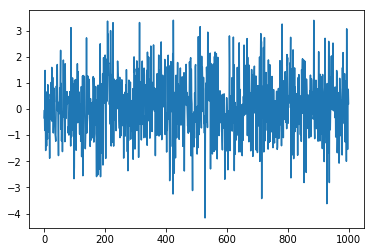

Evolution of the action value for each action


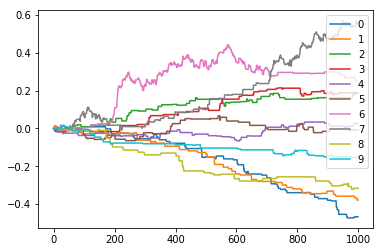

In [29]:
n_arms = 10
n_steps = 1000
epsilon = 0.5
alpha = 0.01
drift = 0.025

nab = drifting_n_armed_bandit(n_arms, drift)
q = np.zeros(nab.n_actions)
rwd = np.zeros(n_steps)
q_ev = np.zeros((n_arms, n_steps)) # q evolution
a_hist = np.zeros(n_steps) # a history (action)

action = np.random.choice(np.arange(len(q)))

for s in range(n_steps):
    # calc and save reward
    _, reward = nab.get_outcome(0, action)
    rwd[s] = reward
    q[action] = q[action] + alpha * (reward - q[action])
    
    #save q evolution in time
    q_ev[:, s] = q[:]
    a_hist[s] = action
    
    #action selection
    action = e_greedy_policy(q, epsilon)
    
    nab.update_mu()
    
    
print('Reward received each step')
plt.plot(rwd)
plt.show()

print('Evolution of the action value for each action')
for a in range(n_arms):
    plt.plot(q_ev[a,:], label = str(a))
plt.legend()
plt.show()

# **(Optional) Exercise 5:**

In the case of a decaying learning rate  of $\alpha = 1/N(a)$, at the $n$th timestep of encountering the $a$th bandit arm, each past instance of choosing that arm is equally weighted.

Can you analytically show that the above statement is true?

When $\alpha \neq 1/N(a)$, the resulting estimate is a weighted sum of all previously encountered rewards from that arm.
1. Compute analytically or plot the weighting of all previous rewards at the $n$th step in the case of constant learning rate of $\alpha = 0.01$. 
2. What would be the weighting of all previous rewards from a given bandit arm at the $n$th step for an arbitrary sequence of learning rates $\{ \alpha_{1}, ... \alpha_{n}\}$? 